In [1]:
# Loading Libraries
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from keras.layers import (Input, Dense, Concatenate)
from keras.utils import np_utils
import tensorflow as tf


Using TensorFlow backend.


In [2]:
# Loading Data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
# Resizing input, Changing data type
x_train = x_train.reshape(x_train.shape[0], np.prod(x_train.shape[1:]))
x_test = x_test.reshape(x_test.shape[0], np.prod(x_test.shape[1:]))
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [5]:
# Checking Size
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [0]:
# Denoising Autoencoder Architecture

def DNN(features_shape, num_classes, act='relu'):

    # Input
    x = Input(name='inputs', shape=features_shape, dtype='float32')
    o = x
    
    # Encoder / Decoder
    o = Dense(64, activation=act, name='dense1')(o)
    o = Dense(64, activation=act, name='dense2')(o)
    o = Dense(64, activation=act, name='dense3')(o)
    y_pred = Dense(num_classes, activation='sigmoid', name='pred')(o)
    
    # Print network summary
    Model(inputs=x, outputs=y_pred).summary()
    
    return Model(inputs=x, outputs=y_pred)

In [0]:
input_shape2 = (x_train.shape[1],)
num_classes = 10
# Categorical representation
y_train_ohe = np_utils.to_categorical(y_train, num_classes)
y_test_ohe = np_utils.to_categorical(y_test, num_classes)
 
batch_size = 128
epochs = 20
model_fname = 'dnn'




In [9]:
# Call Backs
callbacks = [ModelCheckpoint(monitor='val_acc', filepath=model_fname + '.hdf5',
                             save_best_only=True, save_weights_only=True,
                             mode='min')]

# Compiling model            
deep = DNN(input_shape2, num_classes)
deep.compile(optimizer='adadelta', loss='binary_crossentropy', metrics=['acc'])

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 784)               0         
_________________________________________________________________
dense1 (Dense)               (None, 64)                50240     
_________________________________________________________________
dense2 (Dense)               (None, 64)                4160      
_________________________________________________________________
dense3 (Dense)               (None, 64)                4160      
_________________________________________________________________
pred (Dense)                 (None, 10)                650       
Total params: 59,210
Trainable params: 59,210
Non-trainable params: 0
_________________________________________________________________


In [10]:
# Model Fitting
history = deep.fit(x_train, y_train_ohe, epochs=epochs, 
                   batch_size=batch_size, shuffle=True,
                   validation_data=(x_test, y_test_ohe), 
                   callbacks=callbacks)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 2s 29us/step - loss: 0.3460 - acc: 0.8988 - val_loss: 0.3250 - val_acc: 0.9000
Epoch 2/20
60000/60000 [==============================] - 1s 24us/step - loss: 0.3250 - acc: 0.9000 - val_loss: 0.3250 - val_acc: 0.9000
Epoch 3/20
60000/60000 [==============================] - 1s 24us/step - loss: 0.3248 - acc: 0.9000 - val_loss: 0.3247 - val_acc: 0.9000
Epoch 4/20
60000/60000 [==============================] - 1s 24us/step - loss: 0.3243 - acc: 0.9000 - val_loss: 0.3238 - val_acc: 0.9000
Epoch 5/20
60000/60000 [==============================] - 1s 24us/step - loss: 0.3224 - acc: 0.9000 - val_loss: 0.3190 - val_acc: 0.9000
Epoch 6/20
60000/60000 [==============================] - 1s 24us/step - loss: 0.3037 - acc: 0.9000 - val_loss: 0.2854 - val_acc: 0.9000
Epoch 7/20
60000/60000 [==============================] - 1s 24us/step - loss: 0.2706 - acc: 0.9000 - val_loss: 0.2514 - val_acc

In [27]:
# Saving the weisghts
# deep.load_weights(model_fname + '.hdf5')

# Making Predictions
predictions = deep.predict(x_test)
predicted_classes = np.argmax(predictions, axis=1)
print(predicted_classes)

# Check which items we got right / wrong
correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]

[9 2 1 ... 8 1 5]


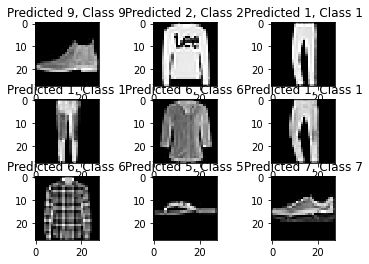

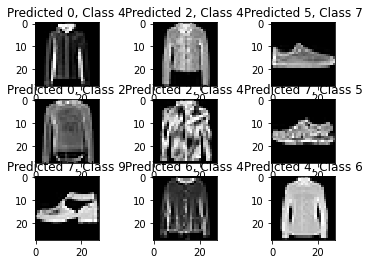

In [28]:
plt.figure()
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct]))
    
plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect]))

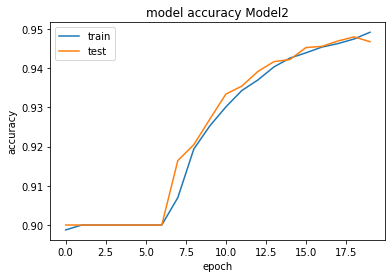

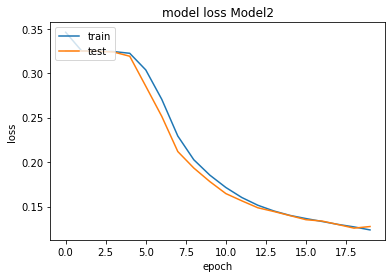

In [33]:
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy Model2')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss Model2')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()